Documented are some pilot data analysis from colornoise experiments.
So far two fitting scripts are used for fitting psychometric functions: exploredata.py based on Psychopy

## Hue stimuli

In [27]:
from IPython.display import IFrame
IFrame('colorcircle-double-labeled.png', width=900, height=500)

## 0. Load data

In [28]:
# import mauve_setup

In [29]:
from exploredata import ExploreData

In [30]:
# hue angles in param files b, c: 0, 45, 90, ...
# hue angles in param files d, e: 22.5, 67.5, 90, ...

data_ysu_1 = ExploreData('ysu', sel_par=['cn2x8_LL_b', 'cn2x8_LL_c'], sel_ses=['202009'])
data_ysu_2 = ExploreData('ysu', sel_par=['cn2x8_LL_d', 'cn2x8_LL_e'], sel_ses=['202009'], 
                           rm_ses=['0908T1746', '0910T1620'])  # remove the 2nd and 4th sessions showing low correctness (55%, 60%)
data_fschrader = ExploreData('fschrader', sel_par=['cn2x8_LL_b', 'cn2x8_LL_c'], rm_ses=['0901'])  # remove the first two sessions

## PF fitting by Psychopy
Psychopy can fit psychophysics data to a cumulative Gaussian function and return estimated parameters (centre and standard deviation). The goodness of fit is represented by the sum of squares (ssq).

The circle size in the figure below is scaled by the weights of trial numbers. 

## 1. PF fitting 1 (abandoned)

### subject: ysu, hue set 1

In [31]:
# data_ysu_1.pfplot()
# data_ysu_1.threshplot(polar=True)
# data_ysu_1.paramplot()

## 2. PF fitting 2: rearrange data!!!
Response is changed from correctness to subject answers "The test hue angle is more counterclockwise ("plus")".

## 2.1. Fit hue set 1
### subject: ysu, fschrader

/home/yannan/PhD-projects/colornoise/colorpalette.py:183: UserWarning: No subjective adjustment is requested.
  warnings.warn("No subjective adjustment is requested.")


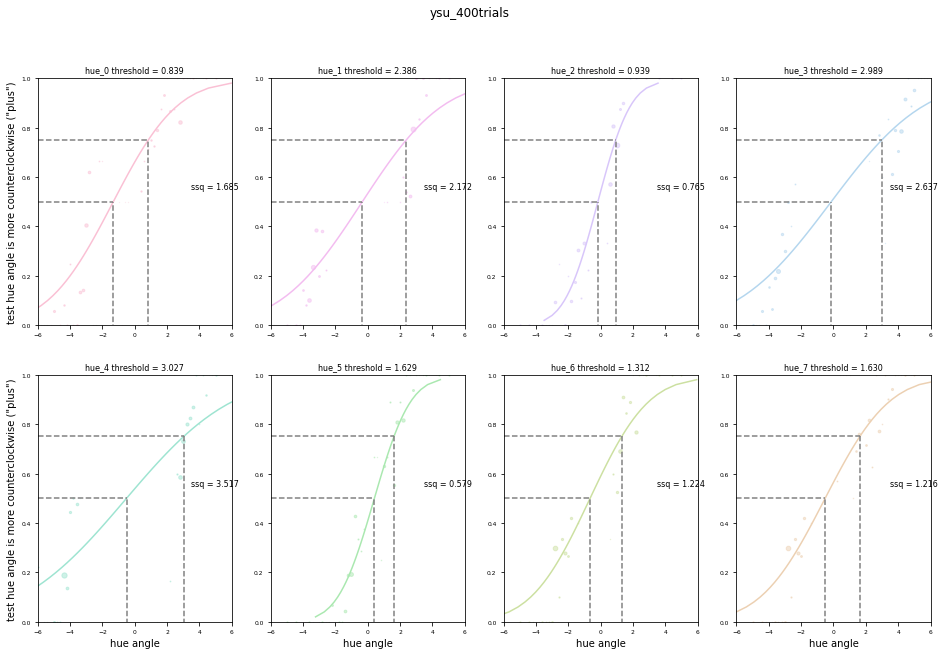

/home/yannan/PhD-projects/colornoise/colorpalette.py:183: UserWarning: No subjective adjustment is requested.
  warnings.warn("No subjective adjustment is requested.")


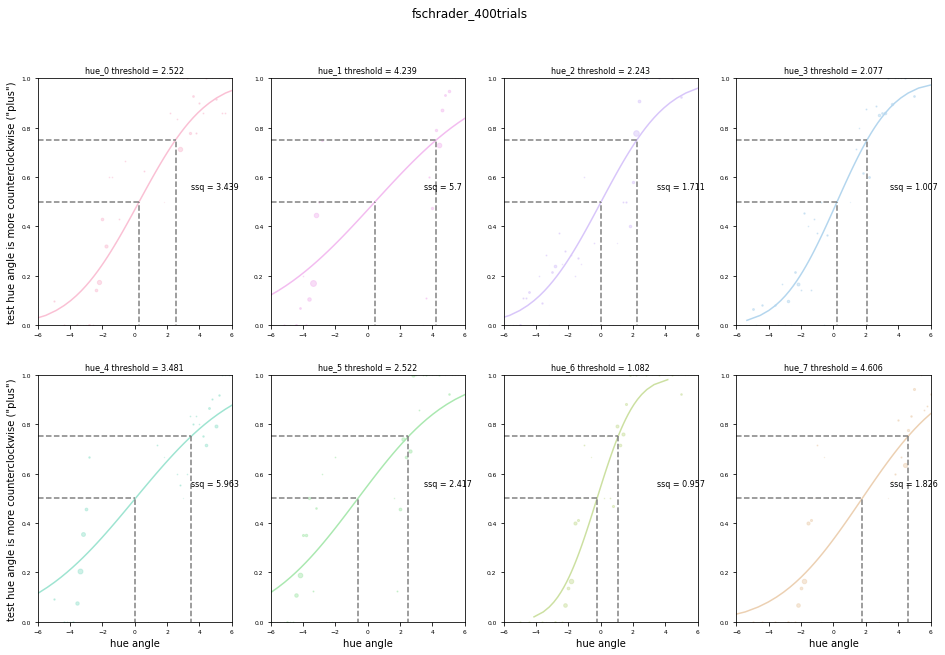

In [32]:
data_ysu_1.rearrange_pfplot()

data_fschrader.rearrange_pfplot()

/home/yannan/PhD-projects/colornoise/colorpalette.py:183: UserWarning: No subjective adjustment is requested.
  warnings.warn("No subjective adjustment is requested.")


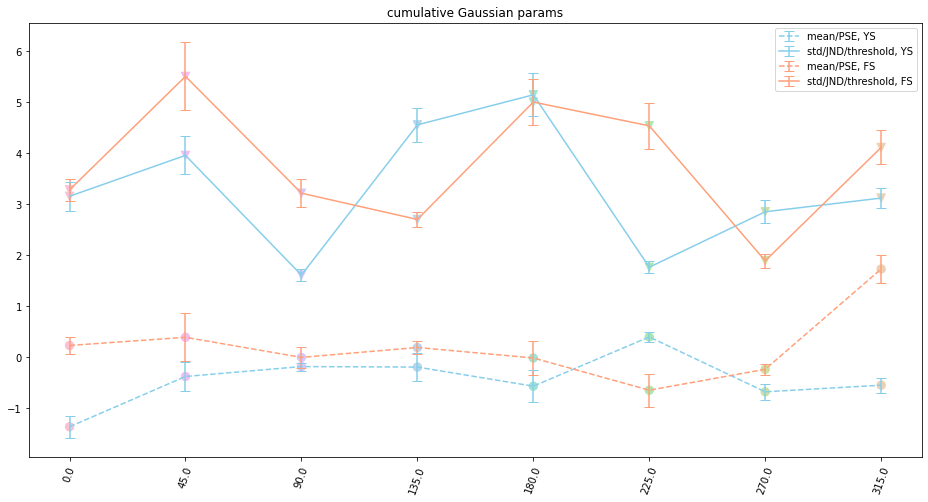

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from exploredata import color4plot


rearr_y = data_ysu_1.rearrange()
rearr_f = data_fschrader.rearrange()

N = 8
angles = [(n / float(N) * 360) for n in range(N)]
color_codes = color4plot(N)



plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
ax.set_title('cumulative Gaussian params')


centre_y = rearr_y['fit'].map(lambda x: x.params[0])
std_y = rearr_y['fit'].map(lambda x: x.params[1])
par_err_y = rearr_y['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))

ax.scatter(range(N), centre_y, s=70, color=color_codes, marker='o')
ax.scatter(range(N), std_y, s=70, color=color_codes, marker='v')
ax.errorbar(range(N), centre_y, yerr=[x[0] for x in par_err_y], 
            label='mean/PSE, YS', color='skyblue', ls='--', capsize=5)
ax.errorbar(range(N), std_y, yerr=[x[1] for x in par_err_y], 
            label='std/JND/threshold, YS', color='skyblue', ls='-', capsize=5)

centre_f = rearr_f['fit'].map(lambda x: x.params[0])
std_f = rearr_f['fit'].map(lambda x: x.params[1])
par_err_f = rearr_f['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))

ax.scatter(range(N), centre_f, s=70, color=color_codes, marker='o')
ax.scatter(range(N), std_f, s=70, color=color_codes, marker='v')
ax.errorbar(range(N), centre_f, yerr=[x[0] for x in par_err_f], 
            label='mean/PSE, FS', color='lightsalmon', ls='--', capsize=5)
ax.errorbar(range(N), std_f, yerr=[x[1] for x in par_err_f], 
            label='std/JND/threshold, FS', color='lightsalmon', ls='-', capsize=5)

ax.set_xticks(range(N))
ax.set_xticklabels(angles)
plt.xticks(rotation=70)
plt.legend()
plt.show()

## 2.2. Combine the two hue sets together
### subject: ysu, hue set 1

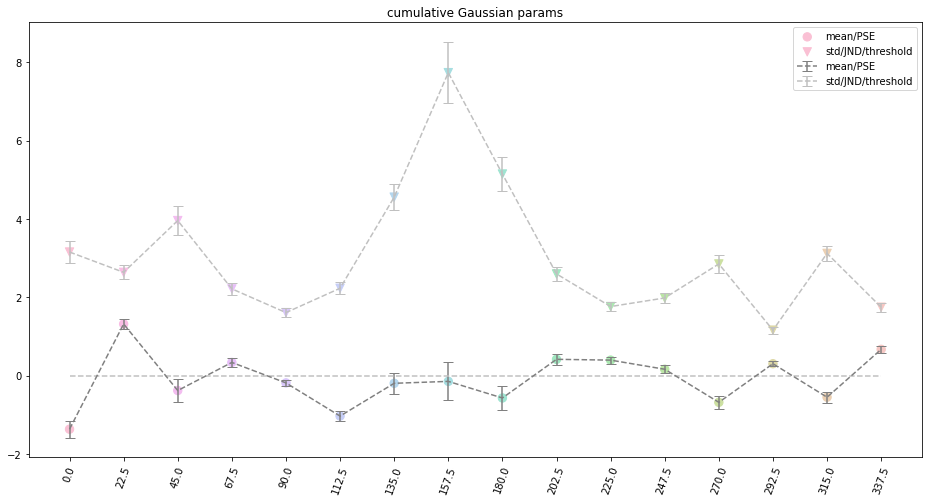

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from exploredata import color4plot

rearr_1 = data_ysu_1.rearrange()
rearr_2 = data_ysu_2.rearrange()

N = 16

angles = [(n / float(N) * 360) for n in range(N)]
color_codes = color4plot(N)

centre_1 = rearr_1['fit'].map(lambda x: x.params[0])
std_1 = rearr_1['fit'].map(lambda x: x.params[1])
par_err_1 = rearr_1['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))

centre_2 = rearr_2['fit'].map(lambda x: x.params[0])
std_2 = rearr_2['fit'].map(lambda x: x.params[1])
par_err_2 = rearr_2['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))

centre = list(itertools.chain(*zip(centre_1, centre_2)))
std = list(itertools.chain(*zip(std_1, std_2)))
par_err = list(itertools.chain(*zip(par_err_1, par_err_2)))

plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
ax.set_title('cumulative Gaussian params')
ax.scatter(range(N), centre, s=70, color=color_codes, marker='o', label='mean/PSE')
ax.scatter(range(N), std, s=70, color=color_codes, marker='v', label='std/JND/threshold')
ax.errorbar(range(N), centre, yerr=[x[0] for x in par_err], 
            label='mean/PSE', color='grey', ls='--', capsize=5)
ax.errorbar(range(N), std, yerr=[x[1] for x in par_err], 
            label='std/JND/threshold', color='silver', ls='--', capsize=5)

ax.plot(range(N), np.repeat(0, N), '--', color='silver')

ax.set_xticks(range(N))
ax.set_xticklabels(angles)
plt.xticks(rotation=70)
plt.legend()